In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')
import nltk # natural language tool-kit
import re

In [2]:
data= pd.read_csv('F://names_dataset.csv', index_col= 'index')
data.head()

,name,sex
index,,
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F


In [3]:
len(data)
# classification Algorithm:
#

95025

In [4]:
#or 
from nltk import word_tokenize


In [5]:
from nltk import bigrams,trigrams,ngrams

In [6]:
ps= nltk.stem.PorterStemmer()

In [7]:
text= 'Mary'
#step->lower case
text= text.lower()
#step-2 feature extraction(Bi)
gram= list(bigrams(text))
features=' '.join([''.join(val) for val in gram])
features

'ma ar ry'

In [8]:
# feture extraction in Text:

def feature_extraction_ngram(text):
    #step-1: Convert into Lower
    text= text.lower()
    #step-2: last word
    lastword = text[-1]
    #step-3: feature extraction (bi)
    gram_bi= list(bigrams(text))
    features_bi = " ".join(["".join(val)for val in gram_bi])
    #step-4: feature extraction (tri)
    gram_tri= list(trigrams(text))
    features_tri = " ".join(["".join(val)for val in gram_tri])
    #features
    features = features_bi+" "+ features_tri+" "+lastword
    return features

In [9]:
data['ngram'] = data['name'].apply(feature_extraction_ngram) # applying it to data

In [10]:
data.head()

,name,sex,ngram
index,,,
0,Mary,F,ma ar ry mar ary y
1,Anna,F,an nn na ann nna a
2,Emma,F,em mm ma emm mma a
3,Elizabeth,F,el li iz za ab be et th eli liz iza zab abe be...
4,Minnie,F,mi in nn ni ie min inn nni nie e


In [11]:
#taking corpurs of words 
corpus_names = data['ngram']  # ngram data
corpus_names.head()

index
0                                   ma ar ry mar ary y
1                                   an nn na ann nna a
2                                   em mm ma emm mma a
3    el li iz za ab be et th eli liz iza zab abe be...
4                     mi in nn ni ie min inn nni nie e
Name: ngram, dtype: object

### Word Embedding:
- Bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv= CountVectorizer(max_features=1000)
X= cv.fit_transform(corpus_names).toarray()   # bag of words data

In [14]:
X, X.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64), (95025, 1000))

In [15]:
cv.get_feature_names()
#if support is highest it shows that it is important feature.
# X[:,0].sum()/len(X)

# max_features---> cal support of each col
#

['aa',
 'aan',
 'aar',
 'ab',
 'abe',
 'abi',
 'abr',
 'ac',
 'ace',
 'ach',
 'aci',
 'ack',
 'ad',
 'ada',
 'add',
 'ade',
 'adi',
 'ado',
 'adr',
 'ae',
 'ael',
 'af',
 'ag',
 'ah',
 'aha',
 'ahi',
 'ahl',
 'ahm',
 'ahn',
 'ai',
 'aia',
 'aid',
 'ail',
 'ain',
 'air',
 'ais',
 'ait',
 'aiy',
 'aj',
 'aja',
 'ak',
 'aka',
 'ake',
 'aki',
 'al',
 'ala',
 'ald',
 'ale',
 'ali',
 'all',
 'alo',
 'aly',
 'am',
 'ama',
 'amb',
 'ame',
 'ami',
 'amo',
 'amy',
 'an',
 'ana',
 'anc',
 'and',
 'ane',
 'ang',
 'ani',
 'anj',
 'ann',
 'ano',
 'ans',
 'ant',
 'any',
 'ao',
 'ap',
 'aq',
 'aqu',
 'ar',
 'ara',
 'arc',
 'ard',
 'are',
 'arg',
 'ari',
 'ark',
 'arl',
 'arm',
 'arn',
 'aro',
 'arr',
 'ars',
 'art',
 'arv',
 'ary',
 'as',
 'asa',
 'ase',
 'ash',
 'asi',
 'ass',
 'ast',
 'at',
 'ata',
 'ate',
 'ath',
 'ati',
 'ato',
 'atr',
 'att',
 'au',
 'aud',
 'aun',
 'aur',
 'av',
 'ava',
 'ave',
 'avi',
 'avo',
 'aw',
 'awn',
 'ax',
 'ay',
 'aya',
 'ayd',
 'aye',
 'ayl',
 'aym',
 'ayn',
 'ays',
 

In [16]:
#coverting into dataframe

data_features = pd.DataFrame(data= X, columns=cv.get_feature_names())
data_features['gender']= data['sex'].replace(['F','M'],[0,1]).values
data_features.head()# print 1st 5 rows

,aa,aan,aar,ab,abe,abi,abr,ac,ace,ach,...,zel,zi,zia,zie,zl,zo,zu,zy,zz,gender
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Spliting data into training and testing:

In [17]:
Xf = data_features.iloc[:,:-1]# ind
y = data_features.iloc[:,-1]# dep

In [18]:
Xf

,aa,aan,aar,ab,abe,abi,abr,ac,ace,ach,...,ze,zel,zi,zia,zie,zl,zo,zu,zy,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
94995    1
94996    1
94997    1
94998    1
94999    1
95000    1
95001    1
95002    1
95003    1
95004    1
95005    1
95006    1
95007    1
95008    1
95009    1
95010    1
95011    1
95012    1
95013    1
95014    1
95015    1
95016    1
95017    1
95018    1
95019    1
95020    1
95021    1
95022    1
95023    1
95024    1
Name: gender, Length: 95025, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Xf,y,test_size=0.2)

### Train Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_rf= RandomForestClassifier(n_estimators=20,criterion='gini',bootstrap=True)### n_estimator is no of decision trees

In [23]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred= model_rf.predict(x_test)

In [25]:
y_pred_prob = model_rf.predict_proba(x_test)

In [26]:
import innomatics

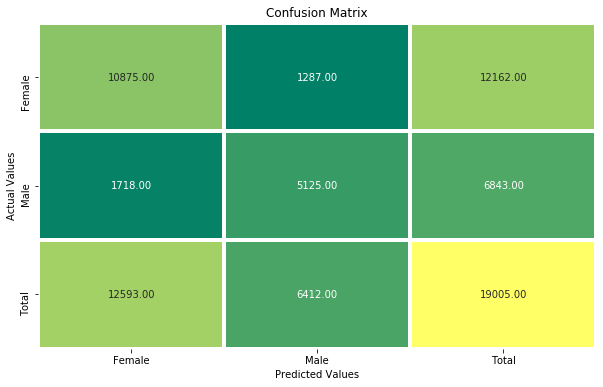

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.86      0.89      0.88     12162
           1       0.80      0.75      0.77      6843

    accuracy                           0.84     19005
   macro avg       0.83      0.82      0.83     19005
weighted avg       0.84      0.84      0.84     19005


************************************Kappa Score************************************


Kappa Score = 0.6521004331210647

******************************Area Under Curve Score******************************


AUC Score = 0.8215595561051049
Number of probabilities to build ROC = 383


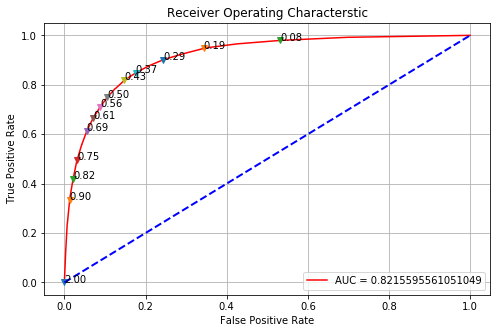

In [27]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob[:,1],label=['Female','Male'],n=30,verbose=True)

**Testing with Your name**

In [28]:
whos

Variable                   Type                      Data/Info
--------------------------------------------------------------
CountVectorizer            type                      <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
RandomForestClassifier     ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X                          ndarray                   95025x1000: 95025000 elems, type `int64`, 760200000 bytes (724.9832153320312 Mb)
Xf                         DataFrame                        aa  aan  aar  ab  <...>5025 rows x 1000 columns]
bigrams                    function                  <function bigrams at 0x0000001BA2DF4BF8>
corpus_names               Series                    index\n0                 <...>gth: 95025, dtype: object
cv                         CountVectorizer           CountVectorizer(analyzer=<...>er=None, vocabulary=None)
data                       DataFrame                               name sex   <...>n[95025 rows x 3 c

In [29]:
name = input('Enter any name: ')
# step-1--> converting into lower case
name=name.lower()
#step-2--> Feature extraction (2-gram,3-gram,lastletter)
feature = feature_extraction_ngram(name)
#step-3--> comvert it into bag of words vector
bow = cv.transform([feature]).toarray()
# step-4---> apply to your model
res= model_rf.predict(bow)
prob= model_rf.predict_proba(bow)
if res==0:
    print('Name = %r is Female: 0%.4f'%(name,prob[0][0]))
else:
    print('Name = %r is Male: %0.4f'%(name,prob[0][1]))

Enter any name: vyjayanth
Name = 'vyjayanth' is Male: 0.9500


## New data Set INDEXING.text (using lemmatization)